Notebook to do a bit of basic analysis of the DC map graph structure, as well as the properties of a randomly generated set of 100 unique routes that could be used as route cards for the game.

In [11]:
from ttrdc_functions import *
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# read in stations and routes
stations = read_stations_csv('stations.csv')
routes = read_routes_csv('routes.csv')

In [3]:
# define network graph
G = define_network_graph(stations, routes)

In [4]:
# calculate 100 unique routes for the new route list
route_list = calculate_route_list(G, stations, 100)

100%|██████████| 100/100 [00:00<00:00, 7044.40it/s]


In [5]:
# get unique starting points and counts
start_pts = [x[0] for x in route_list]
start_pts, start_counts = np.unique(start_pts, return_counts=True)
# get unique ending points and counts
end_pts = [x[1] for x in route_list]
end_pts, end_counts = np.unique(end_pts, return_counts=True)
# get unique point values and counts
pts = [x[2] for x in route_list]
pts, pt_counts = np.unique(pts, return_counts=True)

In [6]:
# print the numbers of unique starting points, ending points, and point values
print('Number of unique starting points: {}'.format(len(start_pts)))
print('Number of unique ending points: {}'.format(len(end_pts)))
print('Number of unique point values: {}'.format(len(pts)))

Number of unique starting points: 34
Number of unique ending points: 34
Number of unique point values: 22


In [7]:
# print number of stations
print('Number of stations: {}'.format(len(stations[0])))

Number of stations: 36


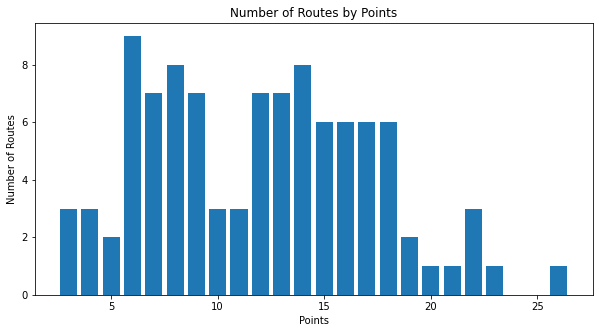

In [8]:
# visualize points
plt.figure(figsize=(10, 5))
plt.bar(pts, pt_counts)
plt.xlabel('Points')
plt.ylabel('Number of Routes')
plt.title('Number of Routes by Points')
plt.show()

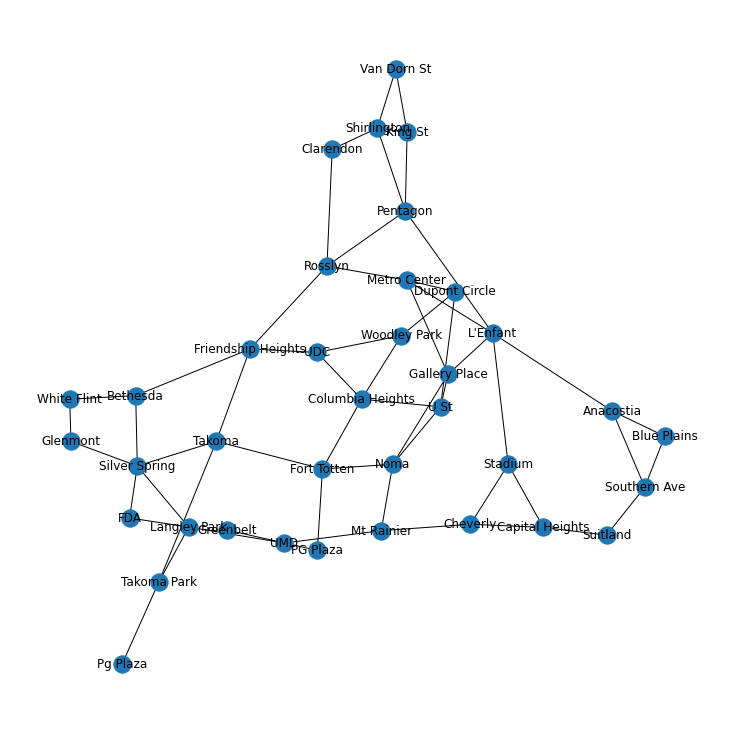

In [9]:
# visualize the graph
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True)
plt.show()

In [12]:
# calculate betweenness centrality
betweenness = nx.betweenness_centrality(G)
# calculate closeness centrality
closeness = nx.closeness_centrality(G)
# calculate degree centrality
degree = nx.degree_centrality(G)

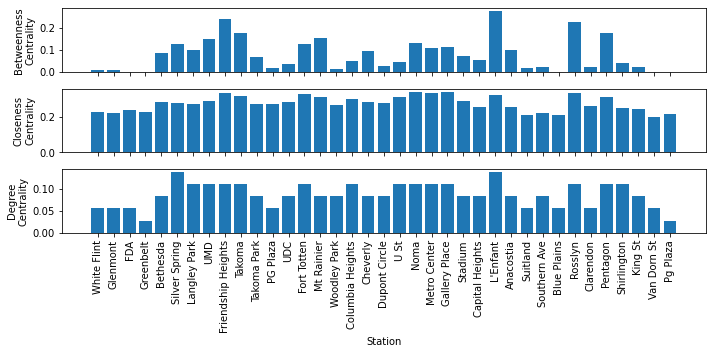

In [13]:
# plot all centrality measures
fig, ax = plt.subplots(3, 1, figsize=(10, 5), sharex=True)
ax[0].bar(betweenness.keys(), betweenness.values())
ax[0].set_ylabel('Betweenness\nCentrality')
ax[1].bar(closeness.keys(), closeness.values())
ax[1].set_ylabel('Closeness\nCentrality')
ax[2].bar(degree.keys(), degree.values())
ax[2].set_ylabel('Degree\nCentrality')
ax[2].set_xlabel('Station')
# rotate x-axis labels
for tick in ax[2].get_xticklabels():
    tick.set_rotation(90)
plt.tight_layout()
plt.show()